# **Installing Required Libraries**

In [1]:
!pip install -q ultralytics roboflow fastapi kaleido python_multipart uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB

# **Importing Required Packages/Libraries**

In [2]:
import os
import glob
from IPython.display import Image, display
import ultralytics
from roboflow import Roboflow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# **Check for GPU Availability and Useability**

In [3]:
!nvidia-smi

Mon Aug 11 08:29:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# **Setting the HOME directory for this Project**

In [4]:
HOME = os.getcwd()
print(HOME)

/content


# **Installing Ultralytics for this Project and Then Importing It**

In [5]:
ultralytics.checks()

Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 43.3/112.6 GB disk)


# **Create A Directory Called datasets in HOME Directory**

In [6]:
!mkdir {HOME}/datasets

# **Going to the HOME Directory**

In [7]:
%cd {HOME}/datasets

/content/datasets


# **Setting the RoboFlow Key and Setting the Project and Getting the Dataset**

In [8]:
rf = Roboflow(api_key = "NqicMLRLoejDf6ellOkN")
project = rf.workspace("souhanemri713-gmail-com").project("pothole-xwsqs")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pothole-1 in yolov8:: 100%|██████████| 1932/1932 [00:00<00:00, 9500.49it/s]


# **Go to the HOME directory and Finds Its Location**

In [9]:
%cd {HOME}

/content


In [10]:
%cd {dataset.location}

/content/datasets/pothole-1


# **Runing the YOLOv8 Model in Train Mode on the data**

In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data="/content/datasets/pothole-1/data.yaml" epochs=70 imgsz=640

/content
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/pothole-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

# **Getting All files that are Inside the Train Directory**

In [12]:
!ls {HOME}//runs/detect/train

args.yaml			 labels.jpg	      train_batch2.jpg
BoxF1_curve.png			 results.csv	      val_batch0_labels.jpg
BoxP_curve.png			 results.png	      val_batch0_pred.jpg
BoxPR_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch2520.jpg  val_batch2_labels.jpg
confusion_matrix.png		 train_batch2521.jpg  val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch2522.jpg  weights


# **Rendering an Image of the Confusion Matrix**

/content


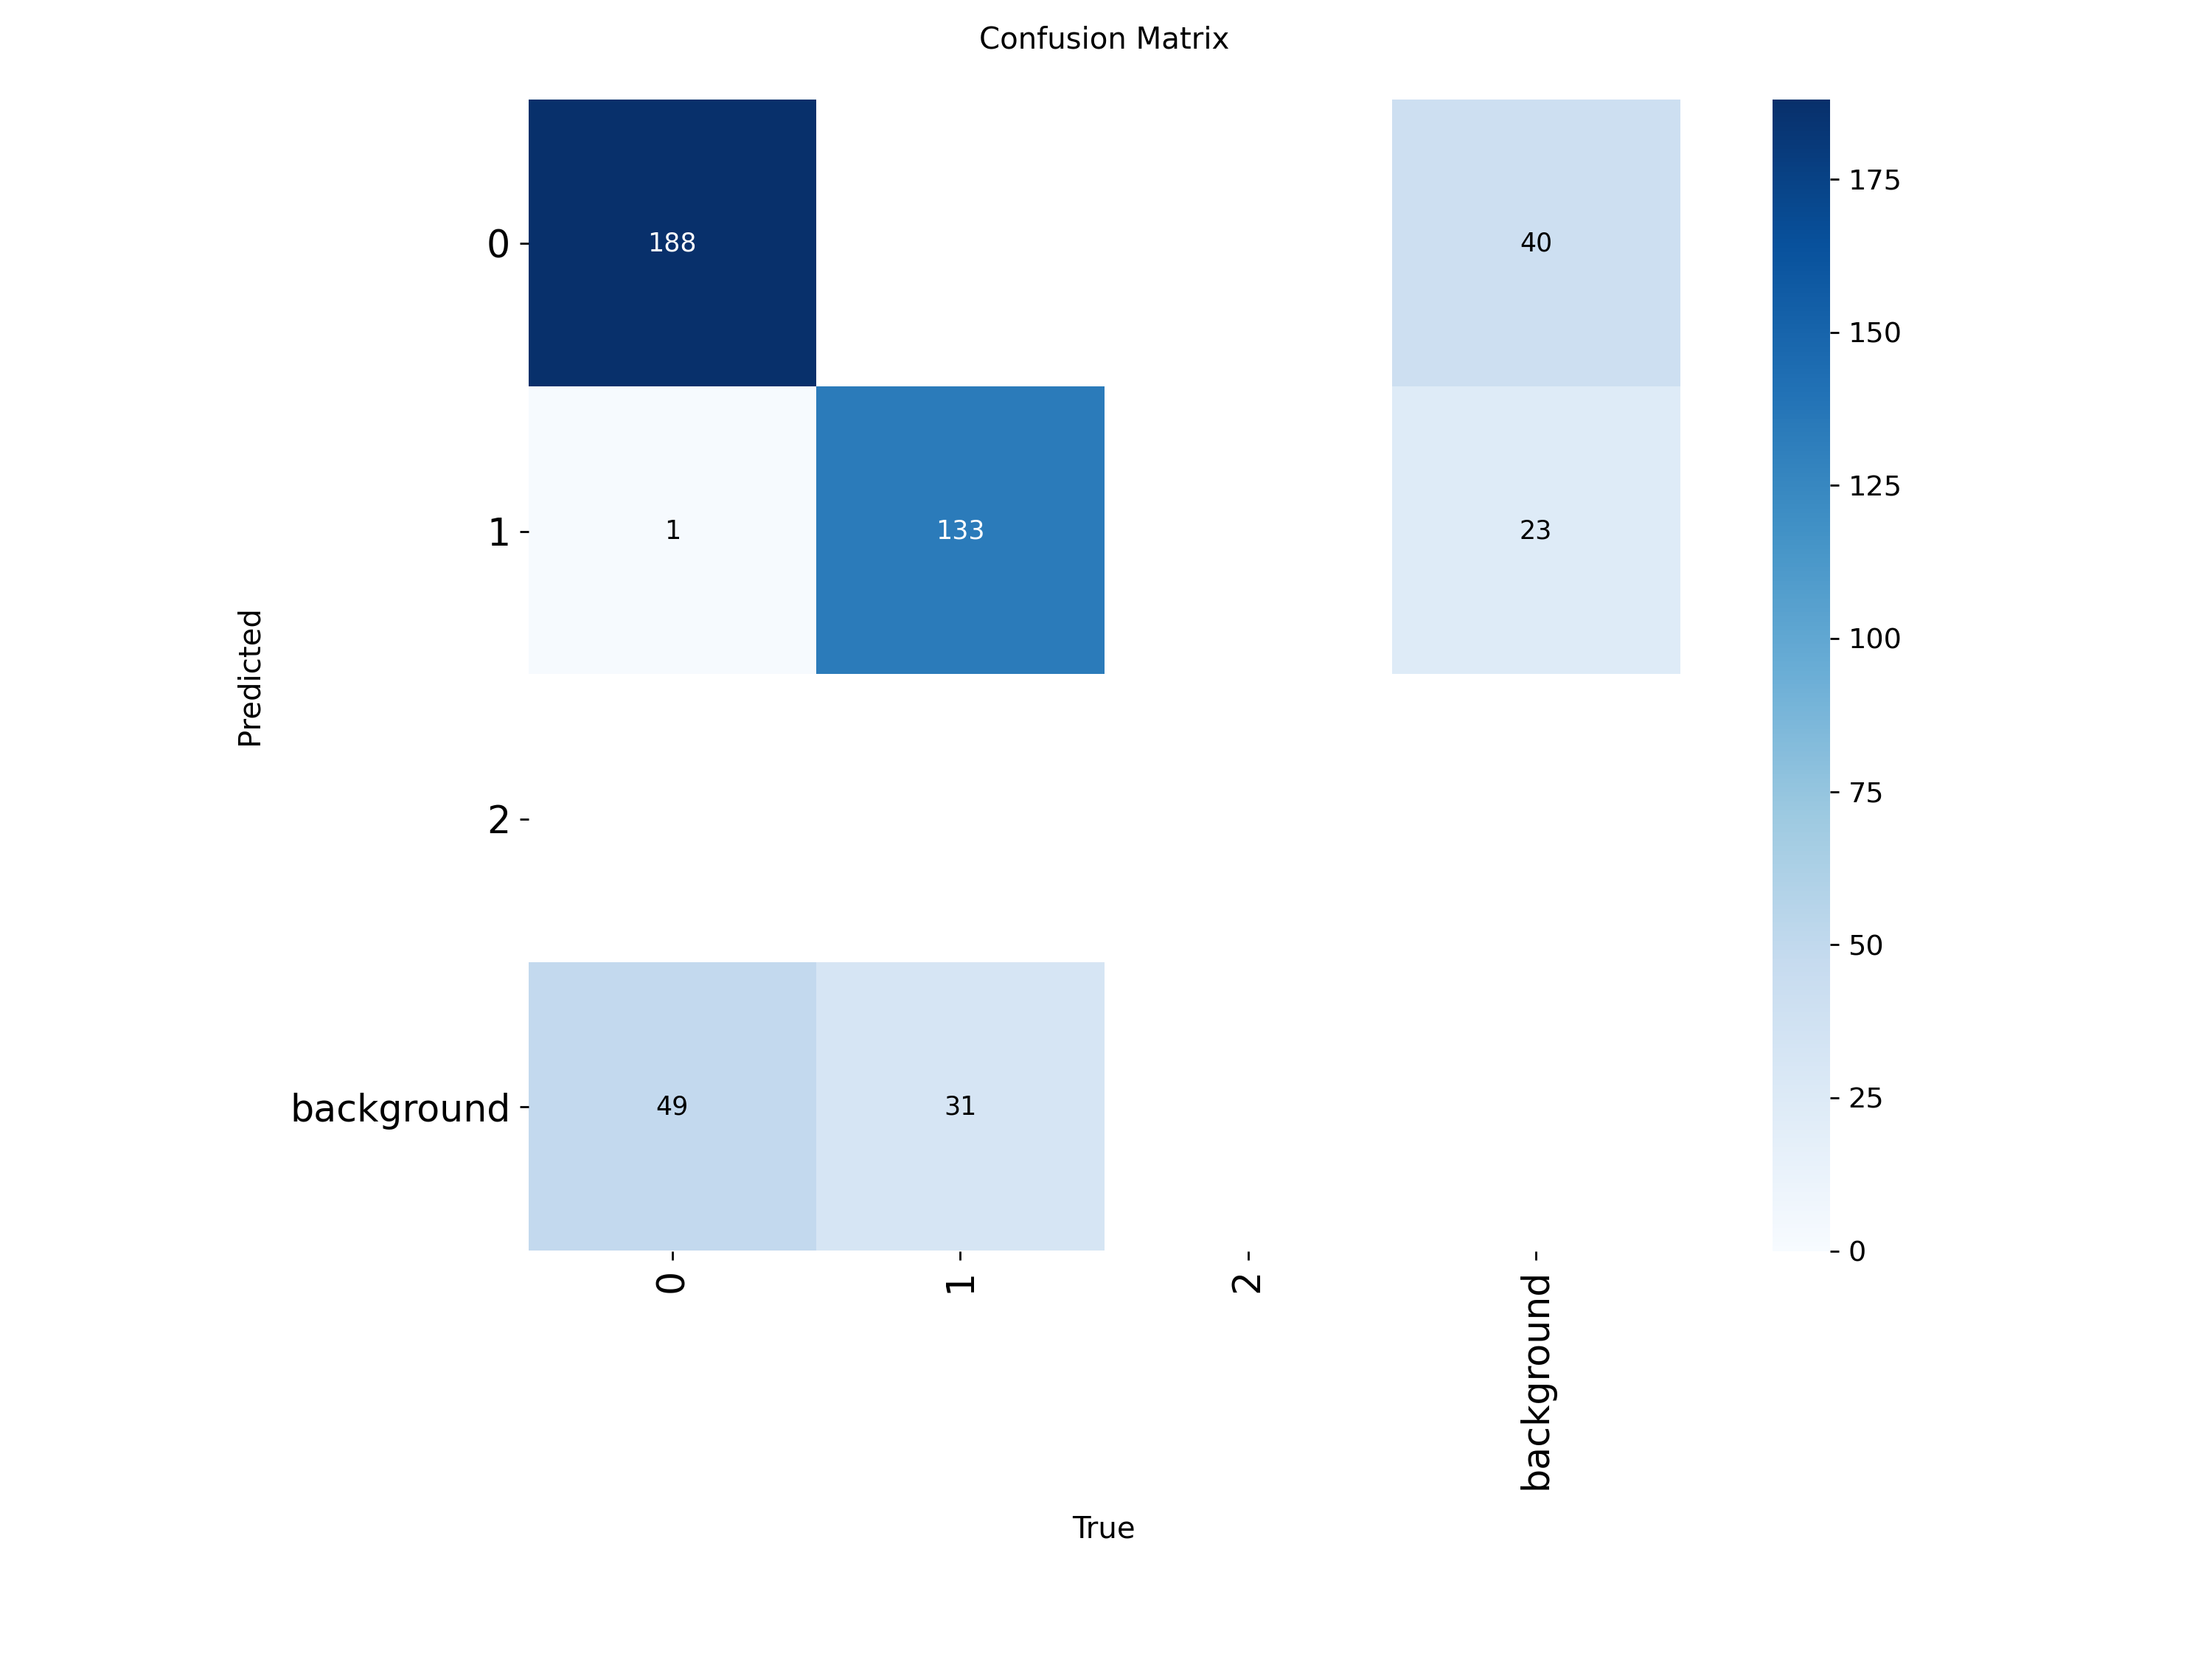

In [13]:
%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/confusion_matrix.png', width = 700, height = 500)

# **Show the Picture of Different Loss Functions**

/content


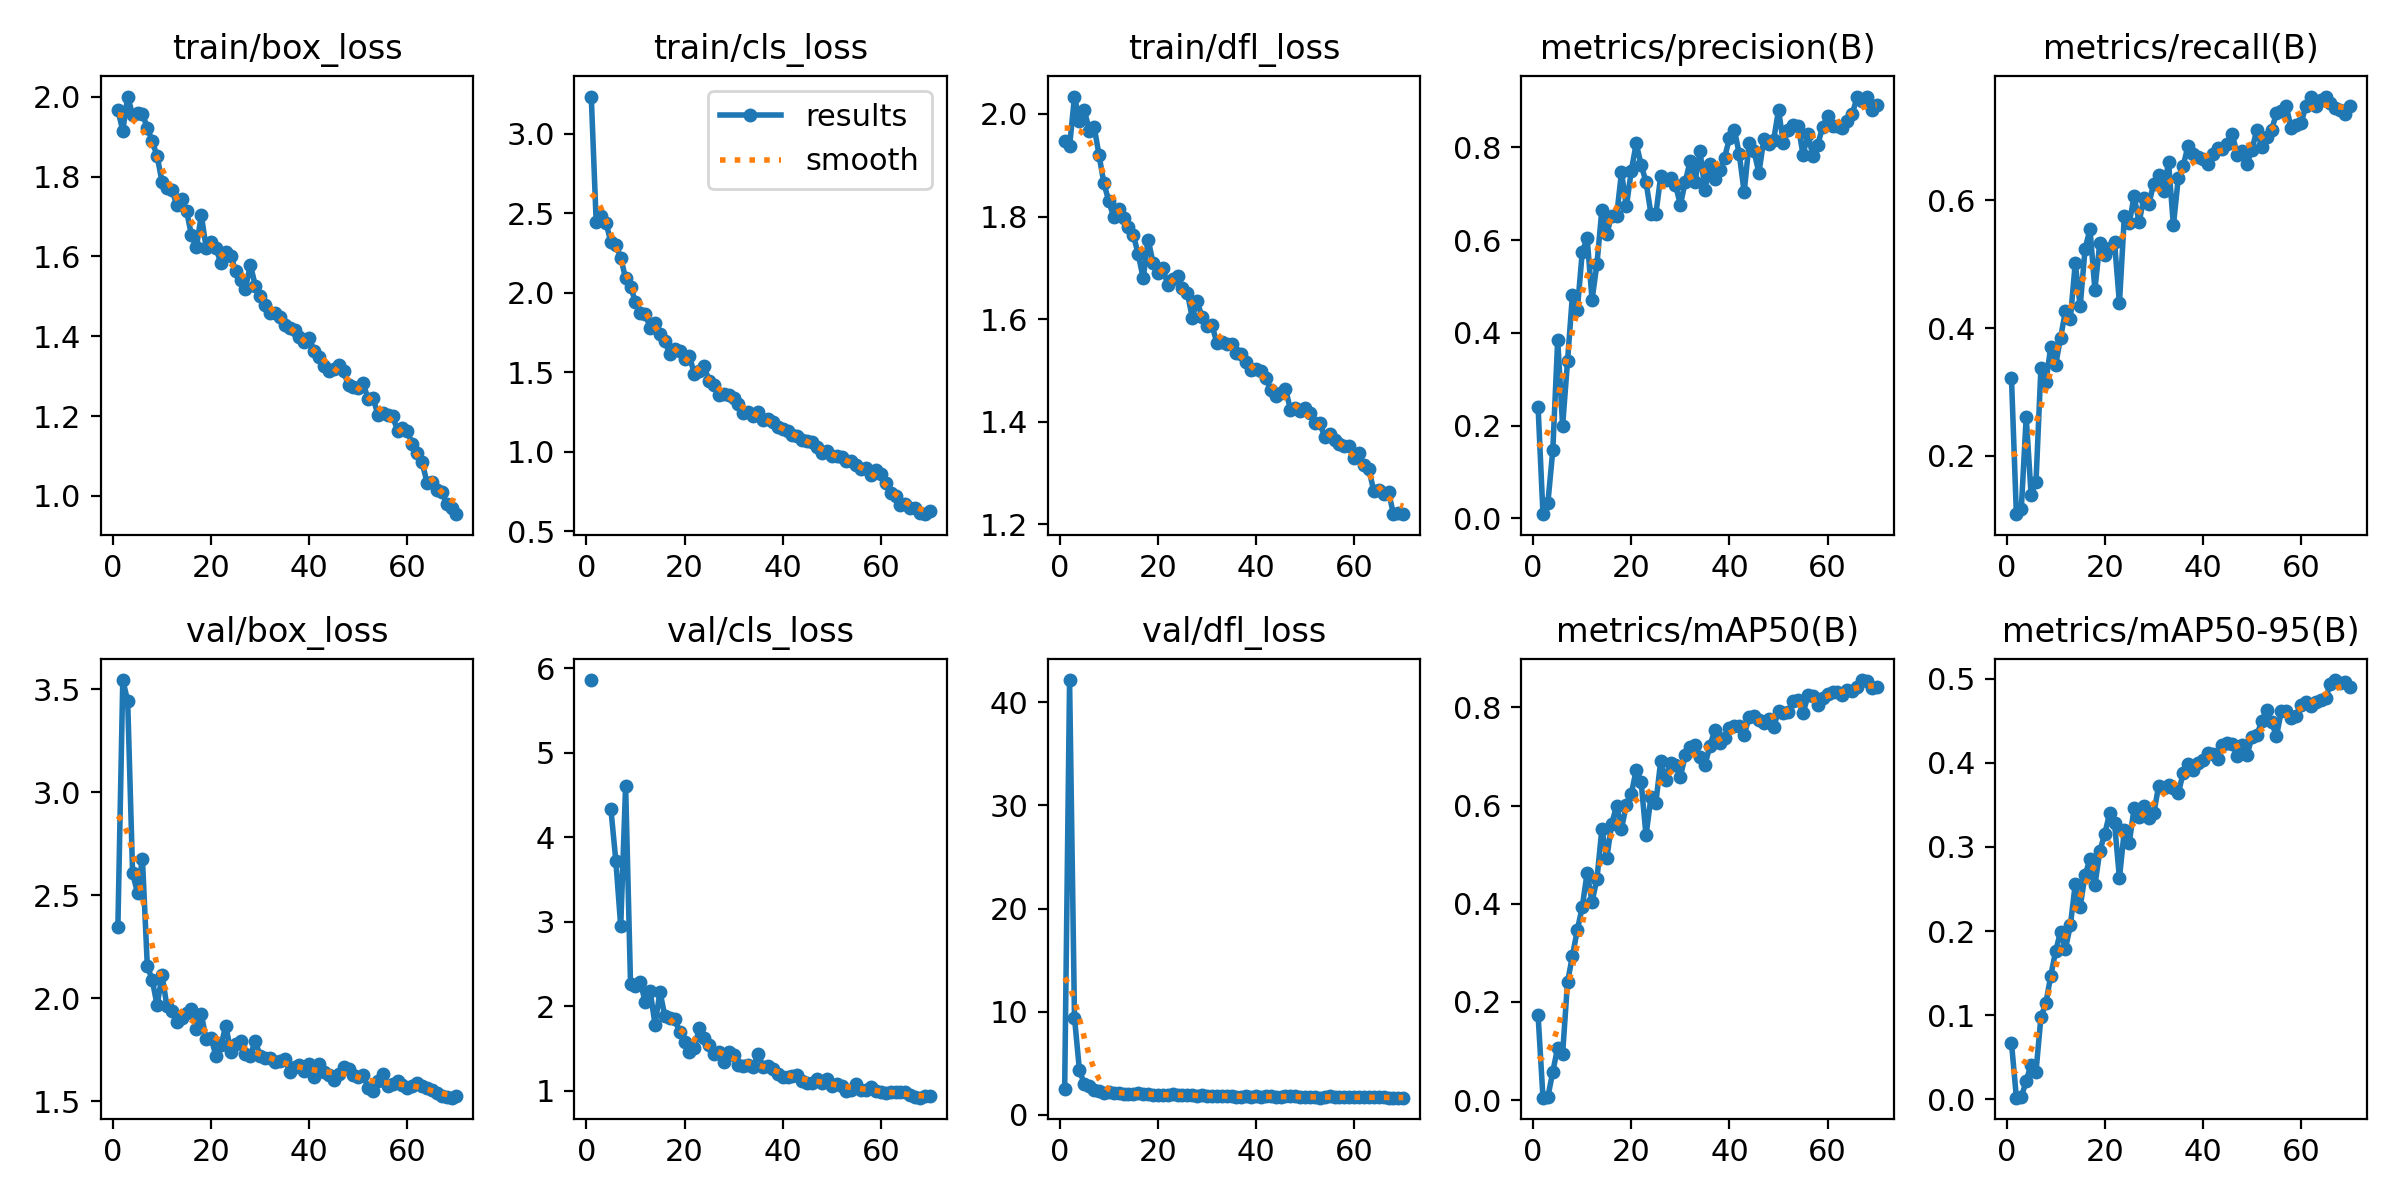

In [14]:
%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/results.png', width = 700, height = 300)

# **Reading some Inference Results**

/content


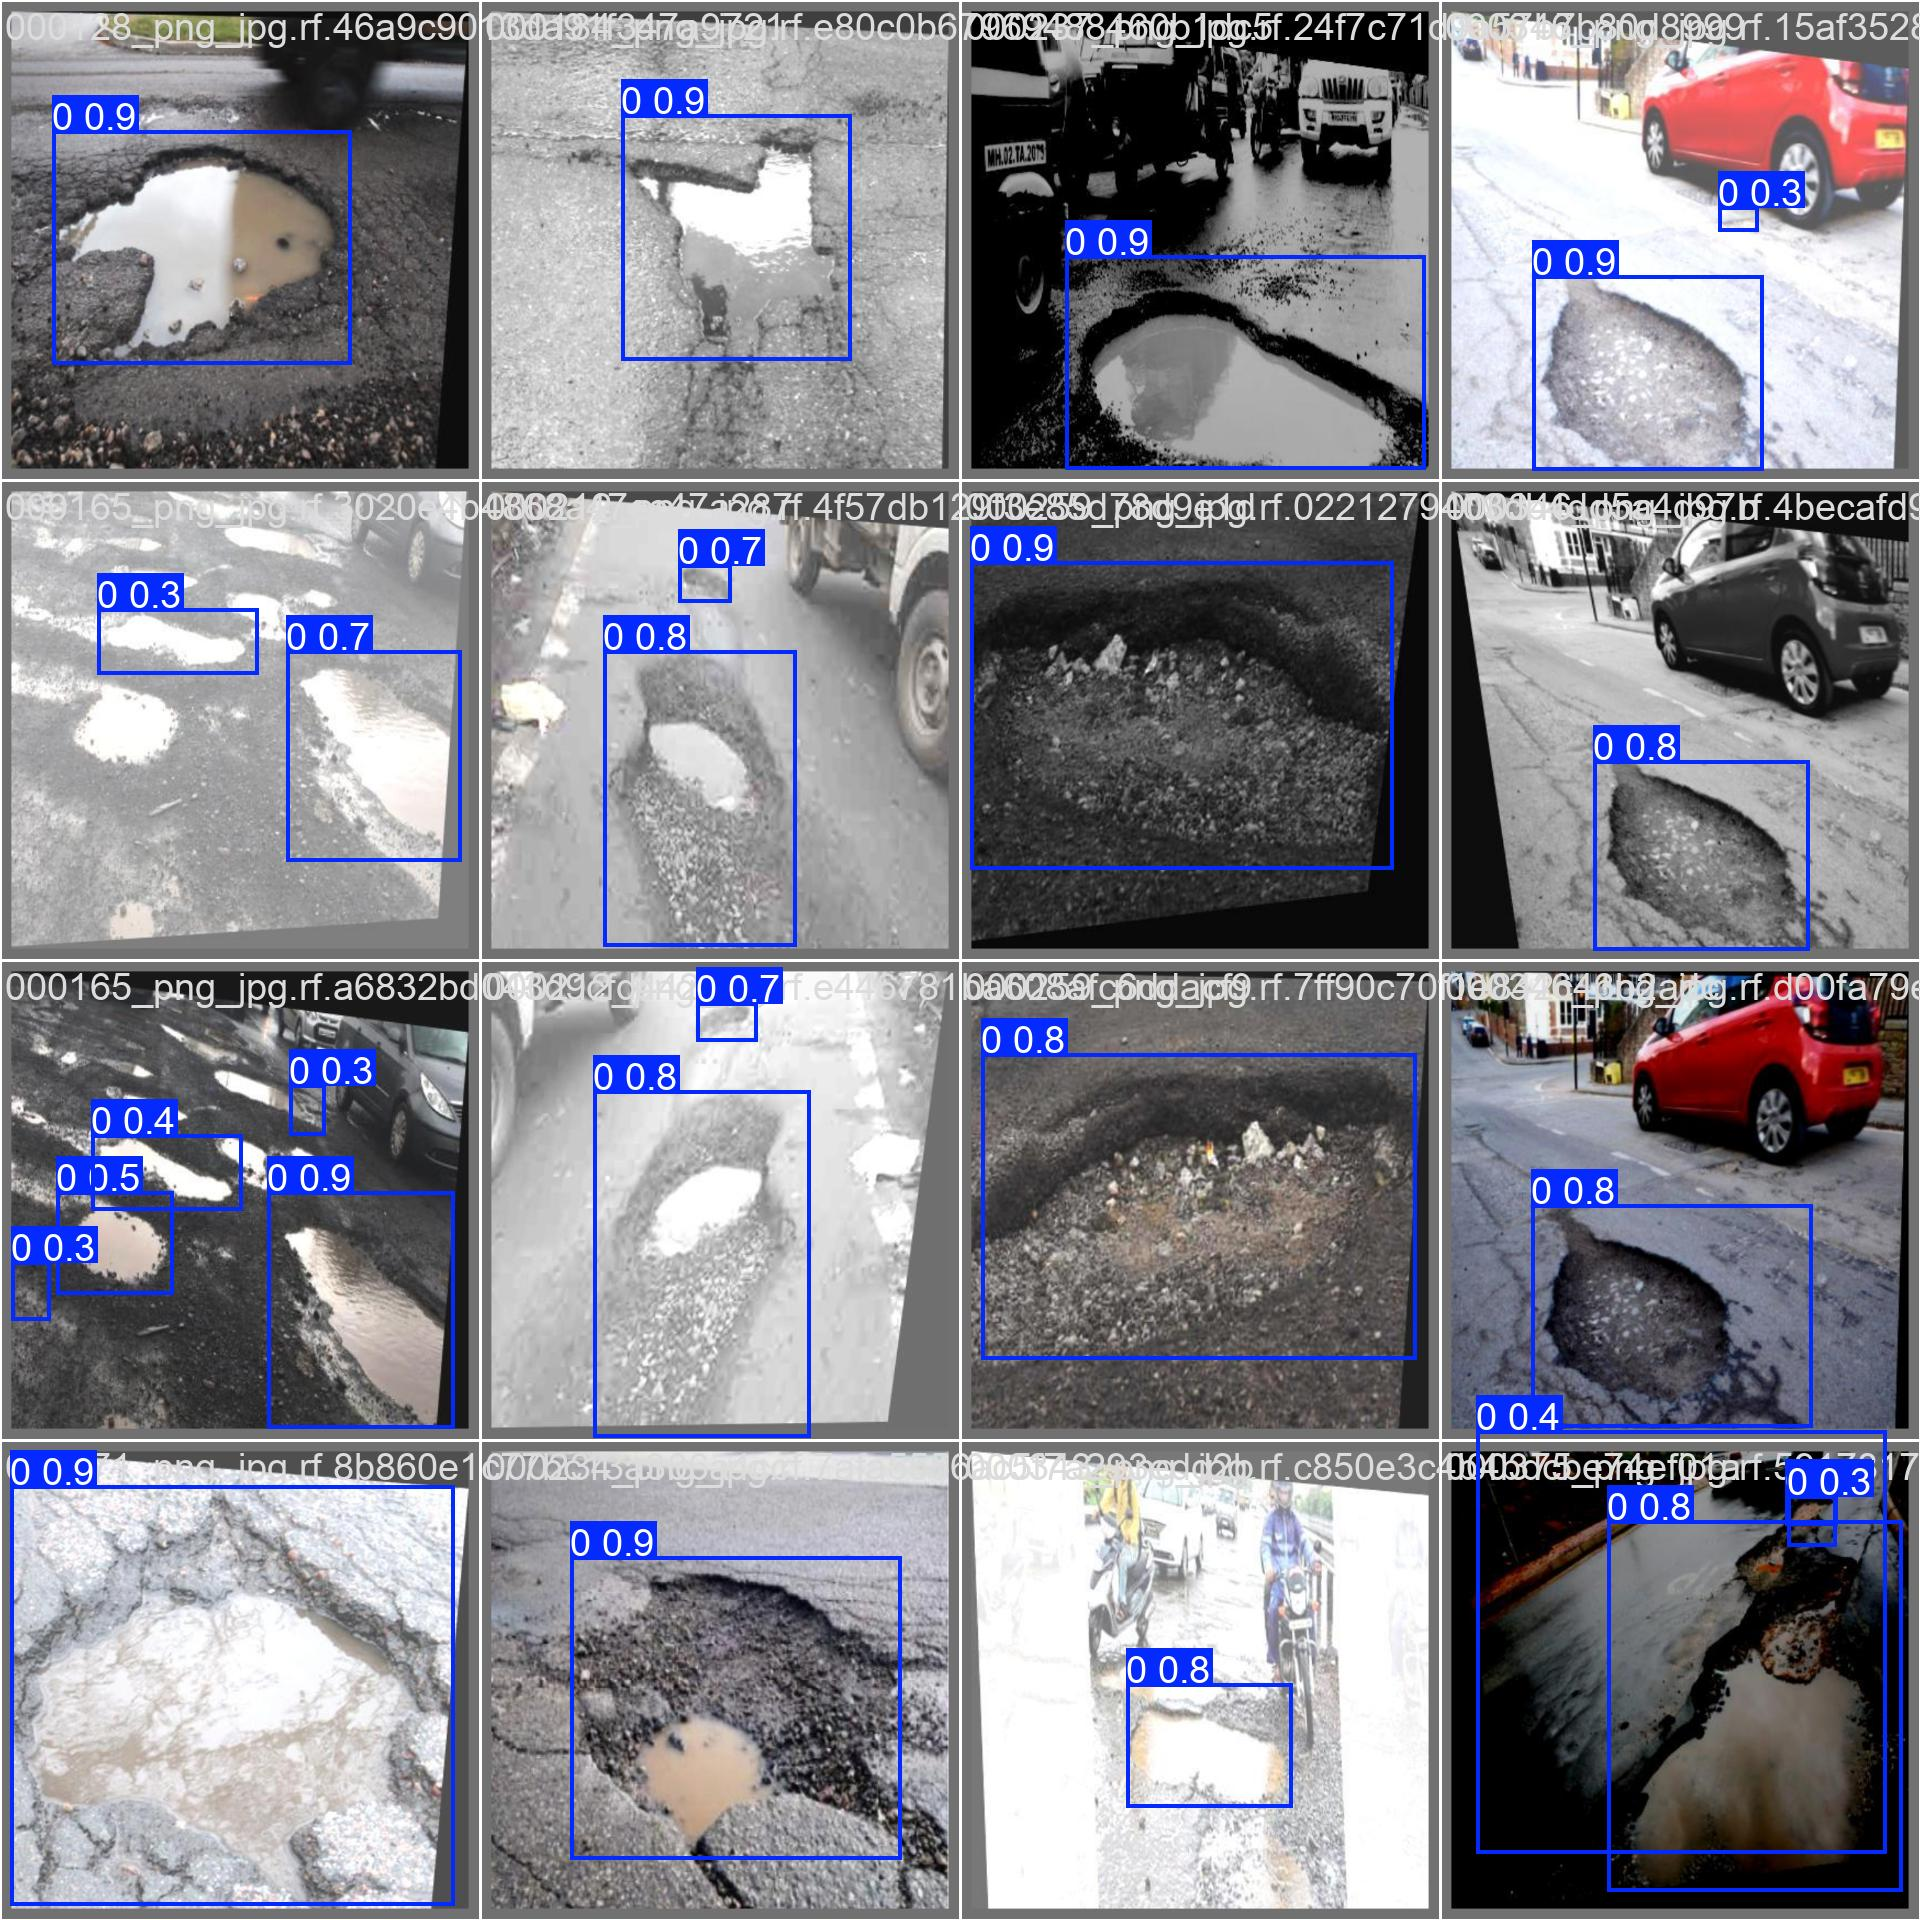

In [15]:
%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width = 800, height = 800)

# **Running the YOLO (best weights) on Evaluation Mode**

In [16]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data="/content/datasets/pothole-1/data.yaml"

/content
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1258.3±294.8 MB/s, size: 29.1 KB)
val: Scanning /content/datasets/pothole-1/valid/labels.cache... 192 images, 0 backgrounds, 0 corrupt: 100% 192/192 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:05<00:00,  2.23it/s]
                   all        192        402      0.899      0.743      0.856      0.497
                     0        109        238      0.906      0.728      0.854       0.48
                     1         83        164      0.892      0.759      0.857      0.514
Speed: 0.7ms preprocess, 21.4ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# **Run the Model's Best Weights on Prediction Mode On the Test Images**

In [17]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.20 source="/content/datasets/pothole-1/test/images"

/content
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs

image 1/96 /content/datasets/pothole-1/test/images/000128_png_jpg.rf.70f656fa078fba0b546025b6fc95c72d.jpg: 640x640 1 0, 1 1, 37.0ms
image 2/96 /content/datasets/pothole-1/test/images/000165_png_jpg.rf.5f23d083791c86b77ae4fc6fa6fd0452.jpg: 640x640 10 0s, 37.0ms
image 3/96 /content/datasets/pothole-1/test/images/000184_png_jpg.rf.5b021b656c9420678bbf1cff88e7a81c.jpg: 640x640 1 0, 37.1ms
image 4/96 /content/datasets/pothole-1/test/images/000272_png_jpg.rf.b3e2810e5368d9a58588a410187bcdda.jpg: 640x640 1 0, 35.3ms
image 5/96 /content/datasets/pothole-1/test/images/000306_png_jpg.rf.7beec19875b3c4f4a167d5746028927a.jpg: 640x640 1 0, 34.7ms
image 6/96 /content/datasets/pothole-1/test/images/000318_png_jpg.rf.0461d9f4d21412c04a5bde4b2ed4831e.jpg: 640x640 3 0s, 34.7ms
image 7/96 /content/datasets/pothole-1/test/images/0003

# **Showing The Image**

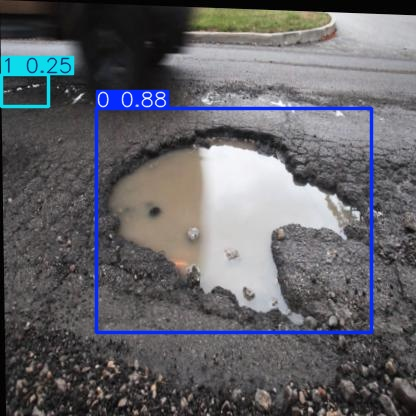

In [18]:
Image('/content/runs/detect/predict/000128_png_jpg.rf.70f656fa078fba0b546025b6fc95c72d.jpg')


# **Predicting The Result on a Video Stream**

In [21]:
%cd {HOME}

!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/TestVideo.mp4'

/content
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/192) /content/TestVideo.mp4: 384x640 (no detections), 54.5ms
video 1/1 (frame 2/192) /content/TestVideo.mp4: 384x640 (no detections), 25.1ms
video 1/1 (frame 3/192) /content/TestVideo.mp4: 384x640 (no detections), 25.1ms
video 1/1 (frame 4/192) /content/TestVideo.mp4: 384x640 (no detections), 25.1ms
video 1/1 (frame 5/192) /content/TestVideo.mp4: 384x640 (no detections), 25.1ms
video 1/1 (frame 6/192) /content/TestVideo.mp4: 384x640 (no detections), 25.1ms
video 1/1 (frame 7/192) /content/TestVideo.mp4: 384x640 (no detections), 25.1ms
video 1/1 (frame 8/192) /content/TestVideo.mp4: 384x640 (no detections), 25.1ms
video 1/1 (frame 9/192) /content/TestVideo.mp4: 384x640 (no detections), 18.7ms
video 1/1 (frame 10/192) /content/TestVideo.mp4: 384x640 (no detections), 16.9ms
video 1/1 (frame 11/192)

# **Show the Pot Holes Detected Video**

In [23]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/TestVideo.avi'

# Compressed video path
compressed_path = "/content/PotHole_Result_0.25_Result_2.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""<video width="640" height="480" controls>
    <source src="{data_url}" type="video/mp4">
</video>""")

Output hidden; open in https://colab.research.google.com to view.